> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

# Importing Important Libraries

In [1]:
#import pandas , numpy , matplotlib , seaborn 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

> **Our Question is**: 
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

### General Properties

Reading The Data Set as a Data Ftame

In [2]:
# read the data set as a dataframe using pandas
df=pd.read_csv('KaggleV2-May-2016.csv')

Showing Some Rows From the data frame

In [3]:
#Showing 5 Rows From the data frame
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Checking if Features have Null Values Or not

In [4]:
#get the information about not null cilumns and its count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Showing The description of data

In [5]:
# Show the Statical info about each column as count mean standard deviation 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# Showing each feature and its type to change nun numerical to numerical 

In [6]:
#show data type for each column
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

# Checking null values with another method

In [7]:
#get the number of null values in each column
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

>There is no Null values

# Checking Dublicates 
we found that the data is free of Dublicated Rows

In [8]:
#get he duplicated values and return their count
df[df.duplicated()].count()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

>there are no Duplicated Rows

# Creating new features From Date and time  

In [9]:
#create new Rows as 
#ScheduledTime using ScheduledDay which contains the ScheduledDay hour
#appointment_day using AppointmentDay and get the day name to store them
#appointment_month using AppointmentDay
df['ScheduledTime'] = pd.to_datetime(df.ScheduledDay).dt.hour
df['appointment_day'] = pd.to_datetime(df.AppointmentDay).dt.day_name()
df['appointment_month'] = pd.to_datetime(df.AppointmentDay).dt.month_name()

# Renaming No-show to NoShow Column to be easy to call it

In [10]:
#Renaming NoShow column to be easy to use
df.rename(columns={'No-show':'NoShow'},inplace=True)

# From the description table we find that the age column contain negative values so we removing it

In [11]:
# get the right ages as there is no negative age
df = df.query('Age >= 0')

# Dropping the unused Columns

In [12]:
#Dropping the un necessary columns 
df.drop(columns='AppointmentDay',inplace=True)
df.drop(columns='ScheduledDay',inplace=True)
df.drop(columns='PatientId',inplace=True)
df.drop(columns='AppointmentID',inplace=True)

# Convert Categorical Values to Numerical to be easy to visualize 

In [13]:
#Convert Categorical Values to Numerical to be easy to visualize
df.NoShow = df.NoShow.map({'Yes':1,'No':0})
df.Gender = df.Gender.map({'M':1,'F':0})

In [14]:
# Creating Neighbourhood , appointment_day ,appointment_month columns as numerical using cat.codes method
df['Neighbourhood']=df['Neighbourhood'].astype('category').cat.codes
df['appointment_day']=df['appointment_day'].astype('category').cat.codes
df['appointment_month']=df['appointment_month'].astype('category').cat.codes

# Checking our Data Set After Cleaning it

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Gender             110526 non-null  int64
 1   Age                110526 non-null  int64
 2   Neighbourhood      110526 non-null  int8 
 3   Scholarship        110526 non-null  int64
 4   Hipertension       110526 non-null  int64
 5   Diabetes           110526 non-null  int64
 6   Alcoholism         110526 non-null  int64
 7   Handcap            110526 non-null  int64
 8   SMS_received       110526 non-null  int64
 9   NoShow             110526 non-null  int64
 10  ScheduledTime      110526 non-null  int64
 11  appointment_day    110526 non-null  int8 
 12  appointment_month  110526 non-null  int8 
dtypes: int64(10), int8(3)
memory usage: 9.6 MB


> All Data Columns are Numerical Now

# Showing some rows again from our Cleaned data to be sure that it is Clean

In [16]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,ScheduledTime,appointment_day,appointment_month
0,0,62,39,0,1,0,0,0,0,0,18,0,0
1,1,56,39,0,0,0,0,0,0,0,16,0,0
2,0,62,45,0,0,0,0,0,0,0,16,0,0
3,0,8,54,0,0,0,0,0,0,0,17,0,0
4,0,56,39,0,1,1,0,0,0,0,16,0,0


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.


### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? NoShow Column

# 1- Plotting Histogram Features

array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Neighbourhood'}>,
        <AxesSubplot:title={'center':'Scholarship'}>],
       [<AxesSubplot:title={'center':'Hipertension'}>,
        <AxesSubplot:title={'center':'Diabetes'}>,
        <AxesSubplot:title={'center':'Alcoholism'}>,
        <AxesSubplot:title={'center':'Handcap'}>],
       [<AxesSubplot:title={'center':'SMS_received'}>,
        <AxesSubplot:title={'center':'NoShow'}>,
        <AxesSubplot:title={'center':'ScheduledTime'}>,
        <AxesSubplot:title={'center':'appointment_day'}>],
       [<AxesSubplot:title={'center':'appointment_month'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

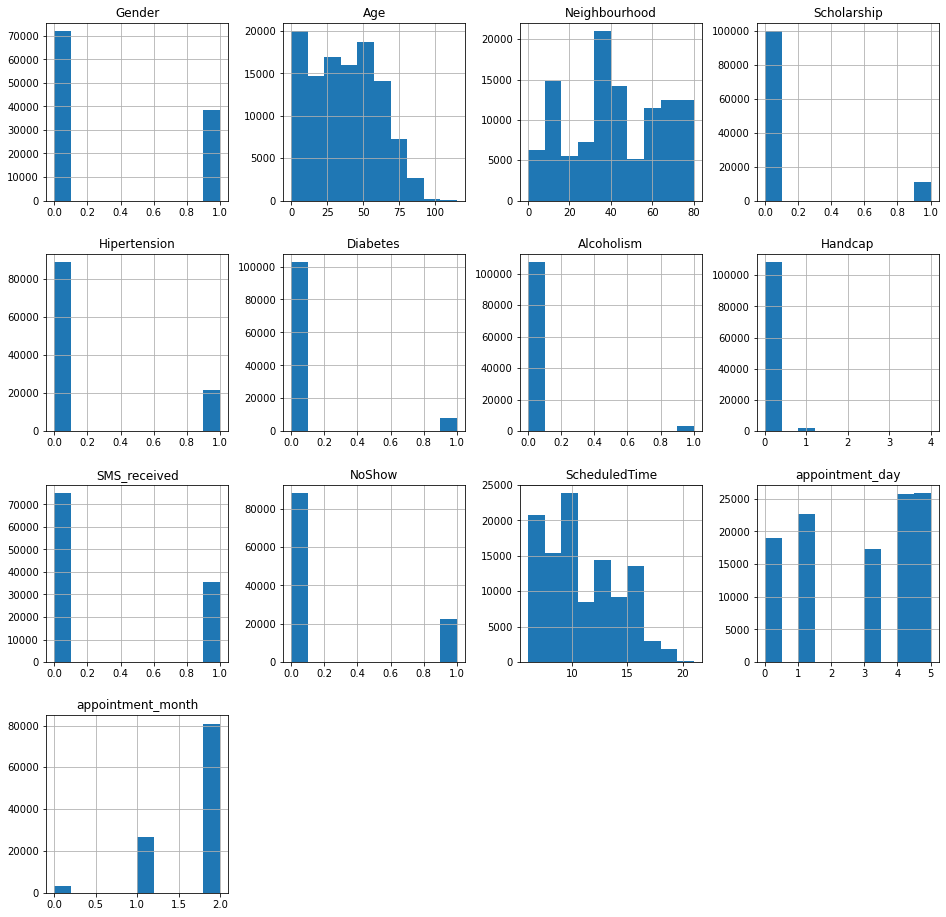

In [17]:
# plotting a histogram for each column density
df.hist(figsize=((16,16)))

> **From this plot we can find that**:
the Most Of Patients dont have Scholarship
the Hipertension Patients are not a high precentage 
3/4 of patients received SMS
Alcoholism patients have low precentage

# 2- Checking the Corrolation Matrix

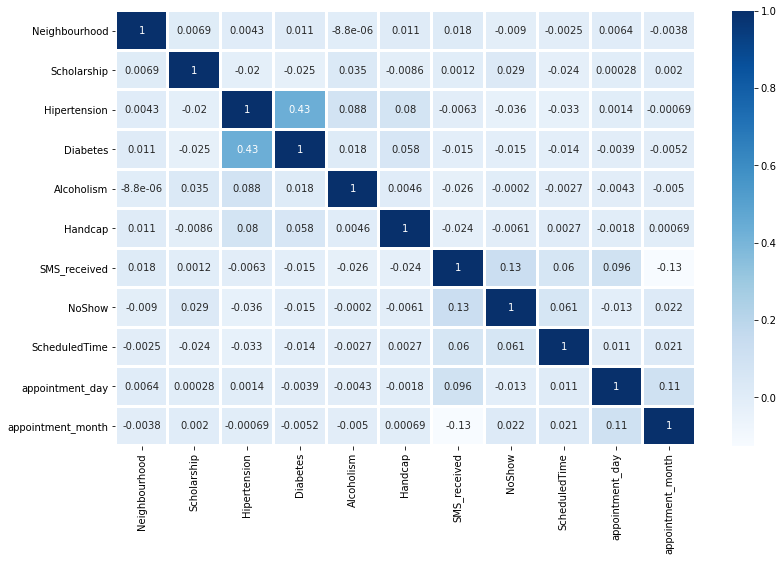

In [18]:
#using Corrolation to get all necessary columns with NoShow column

fig, ax = plt.subplots(1, 1, figsize=(13, 8))
sns.heatmap(df.corr().iloc[2:,2:], annot=True, 
            ax=ax, linewidth=2, cmap='Blues')
plt.show()

>**From the Correlation matrix** :we found that (Scholarship , SMS_received , ScheduledTime) are affecting the NoShow column with high value

# Research Question 1  (No-show appointments!)
#### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

## AFter Checking The Plots We Check again the Most Features make a Relation With NoShow Column 

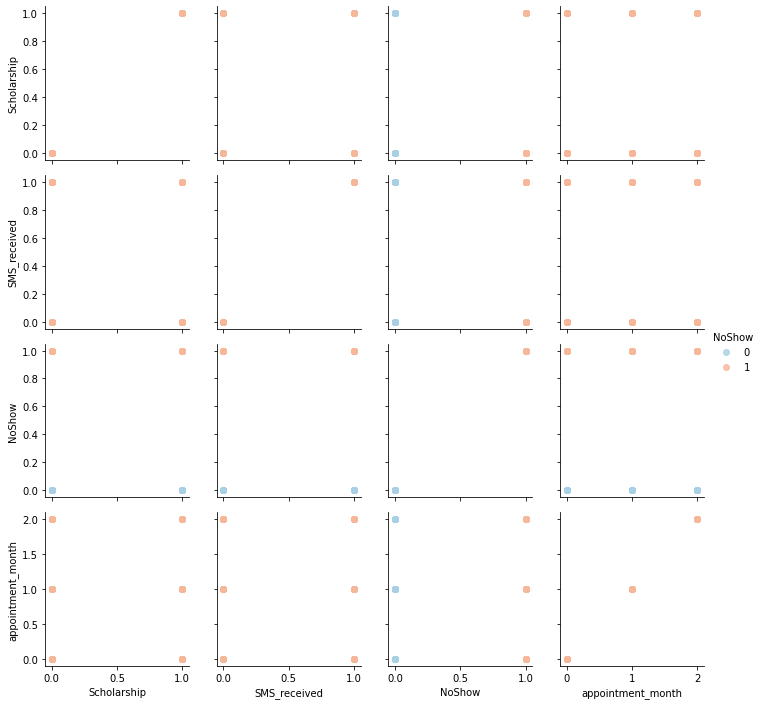

In [19]:
#using scatter to get all necessary columns with NoShow column

g = sns.PairGrid(df, vars=['Scholarship' ,'SMS_received','NoShow','appointment_month'],
                 hue='NoShow', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

> The Relation Between (Scholarship , SMS_received , ScheduledTime) with the NoShow column is clear now

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


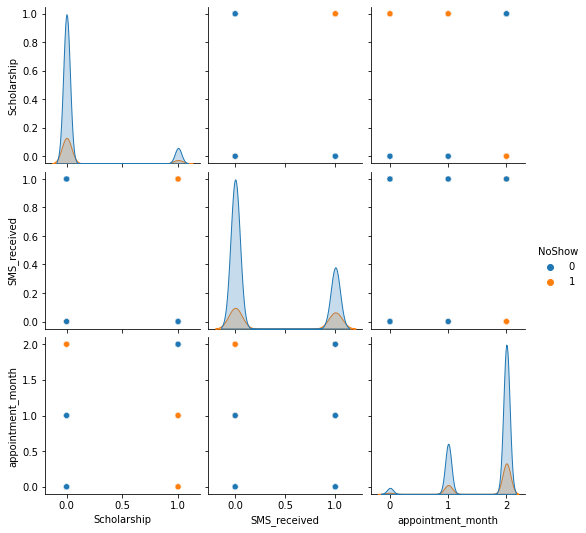

In [20]:
#using pairplot to get all necessary columns with NoShow column

df1=df[['Scholarship' ,'SMS_received','appointment_month','NoShow']]
sns.pairplot(df1, hue='NoShow', size=2.5);

In [23]:
# Plot_boxPlot_Relation is a function which takes 
#the data frame 
#and the column which you want to show the relation between it and the Target Column 
#then it takes the Target Column 
#and return boxplot  between the column which you want to show and the Target Column
def Plot_boxPlot_Relation(df,col,target):
    df.boxplot(column=[col],by=[target],rot=90)
    plt.ylabel(col)
    pd.DataFrame(df.groupby([target])[col].describe().loc[:,['mean','std']])

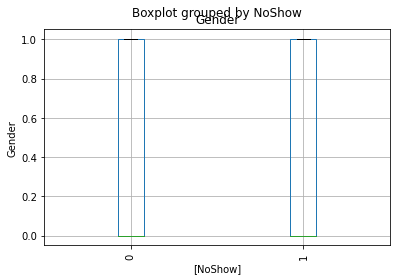

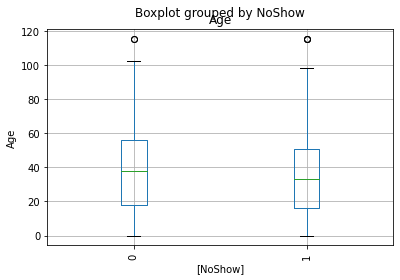

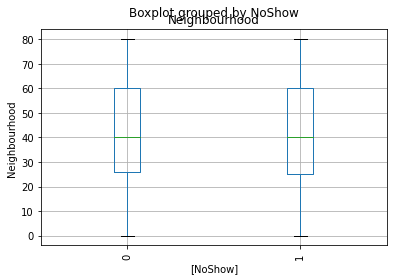

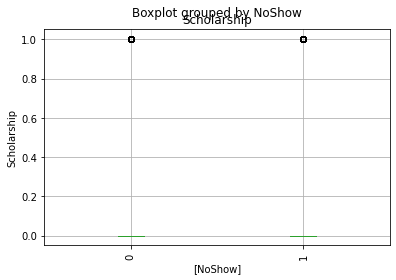

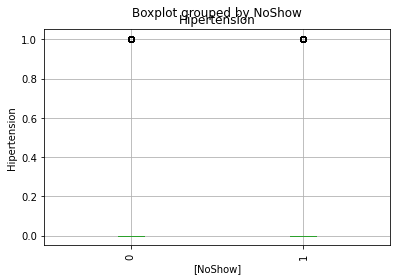

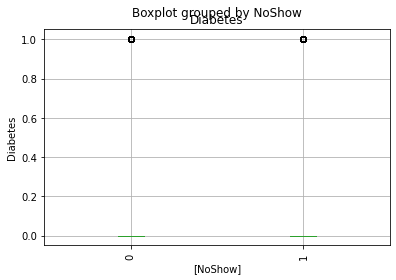

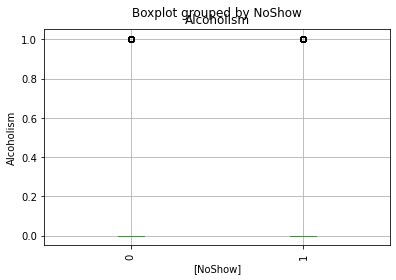

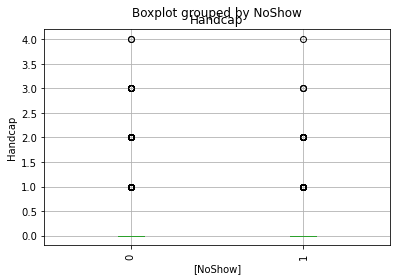

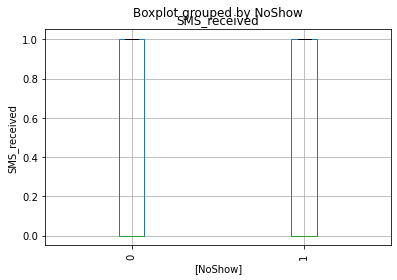

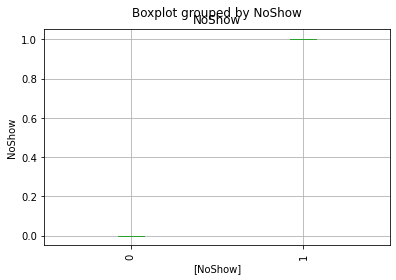

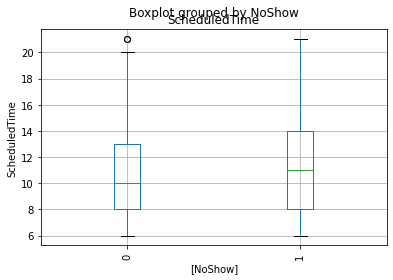

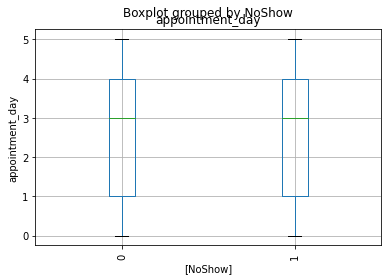

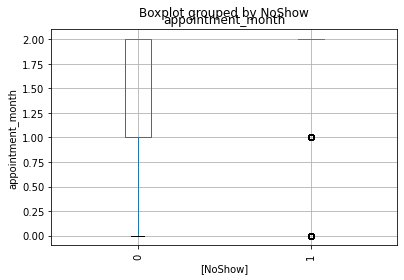

In [24]:
for c in df.columns:
    Plot_boxPlot_Relation(df,c,'NoShow')

> just to be sure that there are no other features afecting the target column

<a id='conclusions'></a>
## Conclusions

> After Checking the data set we found that the data is Clear From Dublicates And Null Values  then found also that the age containing Negative Values so we have droped them as there is no negative ages then we convert the Non Numerical Values to Numerical So We can Easily plot it 

> From the Correlation matrix and the pairplot we found that (Scholarship , SMS_received , ScheduledTime) are affecting the NoShow column with high value
## Limitations
> Couldnt detect direct correlation between many features and the target 
>the column Age Contained negative values